In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import sys
import matplotlib.pyplot as plt
from sklearn import datasets
import tensorflow as tf
from sklearn import utils
from sklearn.model_selection import train_test_split
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.applications import *
from tensorflow.keras.preprocessing import *
from tensorflow.keras.callbacks import EarlyStopping

print(tf.__version__)


from google.colab import drive
drive.mount('/content/drive')

os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/IA2_PROYECTOFINAL/Dataset'
%cd '/content/drive/MyDrive/IA2_PROYECTOFINAL/Dataset/binarios'

2.11.0
Mounted at /content/drive
[Errno 2] No such file or directory: '/content/drive/MyDrive/IA2_PROYECTOFINAL/Dataset/binarios'
/content


In [2]:
X_train= np.load("/content/drive/MyDrive/IA2_PROYECTOFINAL/Dataset/Binarios/x_train.npy")
X_test= np.load("/content/drive/MyDrive/IA2_PROYECTOFINAL/Dataset/Binarios/x_test.npy")
Y_train= np.load("/content/drive/MyDrive/IA2_PROYECTOFINAL/Dataset/Binarios/y_train.npy")
Y_test= np.load("/content/drive/MyDrive/IA2_PROYECTOFINAL/Dataset/Binarios/y_test.npy")



# Primera arquitectura: DNN





In [3]:
#@title DNN
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[32, 32, 3]),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(60, activation='tanh'),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(16, activation='tanh'),
    tf.keras.layers.Dense(8, activation='tanh'),
    tf.keras.layers.Dense(4, activation='tanh'),
   
    #2 clases 
    tf.keras.layers.Dense(2, activation="Softmax")
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
  
  #Select the loss function 
model2.compile(optimizer= optimizer, 
              loss='binary_crossentropy',
              metrics=['accuracy'])
#return model

#model = build_model();
model2.summary()  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 64)                196672    
                                                                 
 dense_1 (Dense)             (None, 60)                3900      
                                                                 
 dense_2 (Dense)             (None, 32)                1952      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 4)                 3

In [4]:
#@title DNN
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[32, 32, 3]),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(60, activation='tanh'),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(16, activation='tanh'),
    tf.keras.layers.Dense(8, activation='tanh'),
    tf.keras.layers.Dense(4, activation='tanh'),
   
    #2 clases 
    tf.keras.layers.Dense(2, activation="Softmax")
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
  
  #Select the loss function 
model2.compile(optimizer= optimizer, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#return model

#model = build_model();
model2.summary()  

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_7 (Dense)             (None, 64)                196672    
                                                                 
 dense_8 (Dense)             (None, 60)                3900      
                                                                 
 dense_9 (Dense)             (None, 32)                1952      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 8)                 136       
                                                                 
 dense_12 (Dense)            (None, 4)                

In [5]:
print(np.shape(X_train),np.shape(Y_train), np.shape(X_test),np.shape(Y_test))


(20710, 32, 32, 3) (20710, 2) (8876, 32, 32, 3) (8876, 2)


Epoch 1/50
324/324 [==============================] - 6s 11ms/step - loss: 0.3105 - accuracy: 0.9104 - val_loss: 0.3161 - val_accuracy: 0.9042
Epoch 2/50
324/324 [==============================] - 3s 8ms/step - loss: 0.3014 - accuracy: 0.9105 - val_loss: 0.3159 - val_accuracy: 0.9042
Epoch 3/50
324/324 [==============================] - 3s 8ms/step - loss: 0.3014 - accuracy: 0.9105 - val_loss: 0.3162 - val_accuracy: 0.9042
Epoch 4/50
324/324 [==============================] - 3s 10ms/step - loss: 0.3014 - accuracy: 0.9105 - val_loss: 0.3161 - val_accuracy: 0.9042
Epoch 5/50
324/324 [==============================] - 4s 11ms/step - loss: 0.3014 - accuracy: 0.9105 - val_loss: 0.3154 - val_accuracy: 0.9042
Epoch 6/50
324/324 [==============================] - 3s 8ms/step - loss: 0.3004 - accuracy: 0.9105 - val_loss: 0.3157 - val_accuracy: 0.9042
Epoch 7/50
324/324 [==============================] - 3s 9ms/step - loss: 0.3015 - accuracy: 0.9105 - val_loss: 0.3157 - val_accuracy: 0.9042
Epo

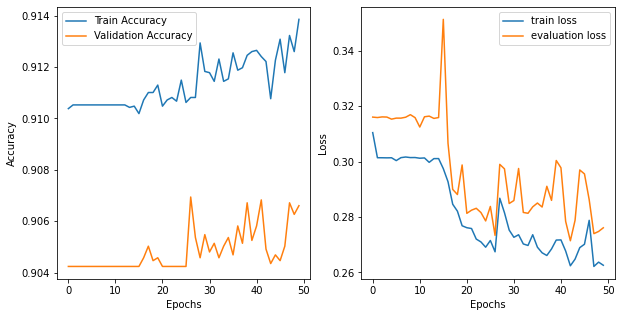

In [6]:
#@title **code**. To show prediction for a specific image
import matplotlib.pyplot as plt
history = model2.fit(X_train, Y_train, epochs=50,verbose=1, batch_size=64, validation_data=(X_test,Y_test))
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

#accuracy debe subur
#y loss bajar 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class_names = ['NR','SR']


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.reshape(32, 32,3), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

278/278 [==============================] - 1s 2ms/step
valor predicho: 1  clase:  SR
max prob:  0.9621953 ground truth:  SR
(8876, 2)


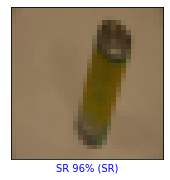

In [8]:
import matplotlib.pyplot as plt
#%run code/dl_plot.py
index_vector =  900
predictions = model2.predict(X_test)
print ("valor predicho:",  np.argmax(predictions[index_vector]), " clase: ", class_names[np.argmax(predictions[index_vector])])
print ("max prob: ", np.max(predictions[index_vector]), "ground truth: ", class_names[np.argmax(Y_test ,axis=1)[index_vector]])

print(predictions.shape)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index_vector, predictions, np.argmax(Y_test ,axis=1), X_test)

278/278 [==============================] - 1s 3ms/step
valor predicho: 1  clase:  SR
max prob:  0.9621953 ground truth:  SR
(8876, 2)


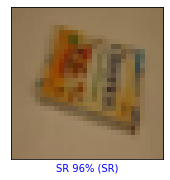

In [9]:
import matplotlib.pyplot as plt
#%run code/dl_plot.py
index_vector =  100
predictions = model2.predict(X_test)
print ("valor predicho:",  np.argmax(predictions[index_vector]), " clase: ", class_names[np.argmax(predictions[index_vector])])
print ("max prob: ", np.max(predictions[index_vector]), "ground truth: ", class_names[np.argmax(Y_test ,axis=1)[index_vector]])

print(predictions.shape)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index_vector, predictions, np.argmax(Y_test ,axis=1), X_test)

278/278 [==============================] - 1s 3ms/step
valor predicho: 1  clase:  SR
max prob:  0.9621953 ground truth:  SR
(8876, 2)


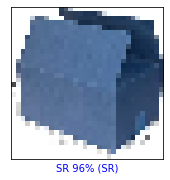

In [10]:
import matplotlib.pyplot as plt
#%run code/dl_plot.py
index_vector =  250
predictions = model2.predict(X_test)
print ("valor predicho:",  np.argmax(predictions[index_vector]), " clase: ", class_names[np.argmax(predictions[index_vector])])
print ("max prob: ", np.max(predictions[index_vector]), "ground truth: ", class_names[np.argmax(Y_test ,axis=1)[index_vector]])

print(predictions.shape)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index_vector, predictions, np.argmax(Y_test ,axis=1), X_test)

278/278 [==============================] - 1s 3ms/step
valor predicho: 1  clase:  SR
max prob:  0.9621953 ground truth:  SR
(8876, 2)


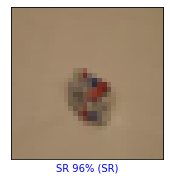

In [11]:
import matplotlib.pyplot as plt
#%run code/dl_plot.py
index_vector =  8873
predictions = model2.predict(X_test)
print ("valor predicho:",  np.argmax(predictions[index_vector]), " clase: ", class_names[np.argmax(predictions[index_vector])])
print ("max prob: ", np.max(predictions[index_vector]), "ground truth: ", class_names[np.argmax(Y_test ,axis=1)[index_vector]])

print(predictions.shape)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index_vector, predictions, np.argmax(Y_test ,axis=1), X_test)